- Import library and read data with pandas 

In [1]:
import pandas as pd
CO2Data = pd.read_csv("MartinezTrejo_etal_2023_TA_DIC_RawData.csv")

- Scatter plot  with linear regretion

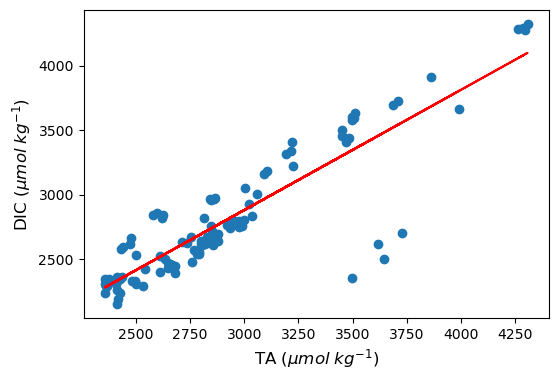

In [5]:
import matplotlib.pyplot as plt
from scipy import stats

x = CO2Data['TA_micromol_kg']
y = CO2Data['DIC_micromol_kg']

plt.scatter(x, y, label='original data')

# Add labels and title
plt.xlabel('TA ($\mu mol  \; kg^{-1}$)', fontsize = 12, )
plt.ylabel('DIC ($\mu mol  \; kg^{-1}$)', fontsize = 12)

# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Plot linear regression 

plt.plot(x, intercept + slope*x, 'r', label='fitted line')

# set the figure size
plt.gcf().set_size_inches(6, 4)

# save the plot as a PDF file paper format 

plt.savefig('DIC_TA_pH.pdf', dpi=300, bbox_inches='tight')

plt.show()

In [3]:
print("r-squared:", r_value**2)
print("p_value:", p_value)

r-squared: 0.7784247010713174
p_value: 8.179416835110045e-36


- Perform  least squares (OLS) regression

In [4]:
import statsmodels.api as sm

#define predictor and response variables
x = CO2Data['TA_micromol_kg']
y = CO2Data['DIC_micromol_kg']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

# export model summary to text file
with open('model_summary.txt', 'w') as file:
    file.write(model.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:        DIC_micromol_kg   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     365.4
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           8.18e-36
Time:                        17:22:53   Log-Likelihood:                -728.75
No. Observations:                 106   AIC:                             1462.
Df Residuals:                     104   BIC:                             1467.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             80.3061    144.021      0.